In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [10]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx.dot(w)
    
    return 1/(2 * len(y)) * np.transpose(e).dot(e)

In [11]:
w = np.transpose(np.array([1,2]))
compute_loss(y, tx, w)

2694.483365887085

# 2 Grid Search

Fill in the function `grid_search()` below:

In [15]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    losses = np.array([compute_loss(y, tx, np.transpose(np.array([w0_i,w1_j]))) for w1_j in w1 for w0_i in w0])
    losses = np.reshape(losses, (len(w0), len(w1)))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.610085652488797, w0*=62.8140703517588, w1*=23.366834170854275, execution time=2.574 seconds


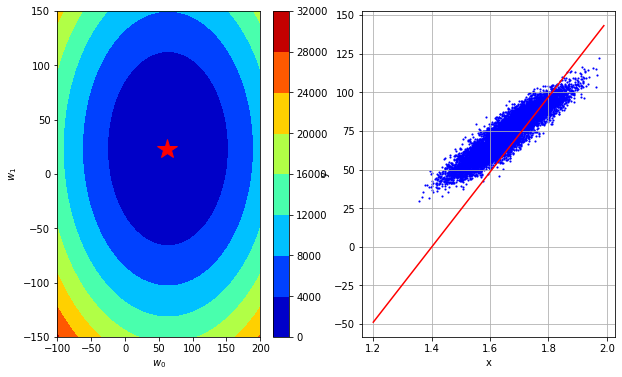

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=200)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [38]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx.dot(w)
    
    return - 1/len(y) * np.transpose(tx).dot(e)

In [40]:
# for testing
yt = np.transpose(np.array([0,1]))
txt = np.array([[1,1],[1,2]])
wt = np.transpose(np.array([1,2]))
compute_gradient(yt, txt, wt)

array([3.5, 5.5])

In [41]:
w = np.transpose(np.array([50,10]))
compute_gradient(y, tx, w)

array([-23.293922  ,  -3.47971243])

Please fill in the functions `gradient_descent` below:

In [84]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, verbose=True):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # update w
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        if verbose:
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [61]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1062606.4462798769, w0=-892.6706077997893, w1=901.3479712434988
Gradient Descent(1/49): loss=860714.1448053948, w0=-796.0741548195998, w1=812.5611453626478
Gradient Descent(2/49): loss=697181.3806110652, w0=-709.1373471374291, w1=732.6530020698818
Gradient Descent(3/49): loss=564719.8416136573, w0=-630.8942202234757, w1=660.7356731063924
Gradient Descent(4/49): loss=457425.9950257575, w0=-560.4754060009175, w1=596.0100770392521
Gradient Descent(5/49): loss=370517.9792895586, w0=-497.09847320061516, w1=537.7570405788258
Gradient Descent(6/49): loss=300122.4865432376, w0=-440.059233680343, w1=485.329307764442
Gradient Descent(7/49): loss=243102.1374187174, w0=-388.7239181120981, w1=438.1443482314967
Gradient Descent(8/49): loss=196915.65462785607, w0=-342.5221341006777, w1=395.67788465184594
Gradient Descent(9/49): loss=159504.60356725845, w0=-300.9405284903993, w1=357.4580674301602
Gradient Descent(10/49): loss=129201.65220817438, w0=-263.51708344114877, w1=

In [62]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [70]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - tx.dot(w)
    
    return - 1/len(y) * np.transpose(tx).dot(e)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
            grad = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w
            w = w - gamma * grad
            # store w and loss
            ws.append(w)
        loss = compute_loss(y, tx, w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [71]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2260.104200499311, w0=39.14427896520646, w1=-44.16782442230749
Stochastic Gradient Descent(1/49): loss=527.626307451829, w0=92.66219671589272, w1=-12.00264957831844
Stochastic Gradient Descent(2/49): loss=70.63501167227301, w0=62.969379646459586, w1=11.504345949152253
Stochastic Gradient Descent(3/49): loss=35.86443634431259, w0=68.15650714669512, w1=9.663422934128512
Stochastic Gradient Descent(4/49): loss=15.469673738231277, w0=72.90900196652557, w1=13.61902612783055
Stochastic Gradient Descent(5/49): loss=15.39172992996616, w0=73.39907586742227, w1=13.454676722848223
Stochastic Gradient Descent(6/49): loss=38.06187024214203, w0=77.23318421454904, w1=8.017645246804966
Stochastic Gradient Descent(7/49): loss=90.75040396003001, w0=84.75833762441435, w1=17.872457205784983
Stochastic Gradient Descent(8/49): loss=38.86044742266284, w0=76.06179102127693, w1=7.211696784053254
Stochastic Gradient Descent(9/49): loss=31.963159386224532, w0=69.9106532624

In [67]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


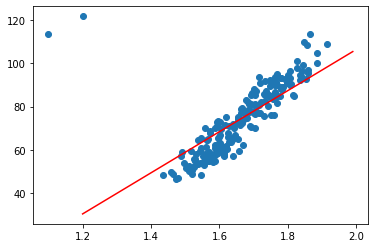

In [89]:
from plots import prediction

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
plt.scatter(height, weight)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
w_initial = np.array([0, 0])
max_iters = 50
gamma = .7

losses, ws = gradient_descent(y, tx, w_initial, max_iters, gamma, verbose=False)

w_0star, w_1star = ws[-1]
pred_x, pred_y = prediction(
        w_0star, w_1star,
        mean_x, std_x)
plt.plot(pred_x, pred_y, 'r')
plt.show()

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)